In [1]:
import os
path_to_frontend = '..'
os.chdir(path_to_frontend)
import q100viz.session as session
import matplotlib.pyplot as plt
import pandas
import datetime

def GAMA_time_to_datetime(input):
    dt_object = int(datetime.datetime.strptime(input[7:-11], '%Y-%m-%d').year)
    return(dt_object)
def grams_to_tons(val):
    return val / 1000000

pygame 2.1.2 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
loading src_points: [[-3.700000000000001, 5.700000000000003], [-2.7000000000000033, 140.60000000000008], [117.69999999999996, 137.8], [117.39999999999998, 1.5000000000000013]]
loading dst_points: [[80, 45], [80, 1035], [1840, 1035], [1840, 45]]


/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_S', 1)
/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_H', 1)


## load source data:

In [3]:

# source data:
df_emissions = pandas.read_csv("/home/dunland/github/qScope/data/outputs/output_20221104_10-02-34/emissions/CO2_emissions_neighborhood.csv")
df_emissions['current_date'] = df_emissions['current_date'].apply(GAMA_time_to_datetime)
df_emissions['emissions_neighborhood_total'] = df_emissions['emissions_neighborhood_total'].apply(grams_to_tons)

df_connections = pandas.read_csv("/home/dunland/github/qScope/data/outputs/output_20221104_10-02-34/connections/connections_export.csv")
df_connections['current_date'] = df_connections['current_date'].apply(GAMA_time_to_datetime)
df_connections['value'] = df_connections['value'] * len(session.buildings.df) / 100

# reference data:
df_emissions_compare = pandas.read_csv("/home/dunland/github/qScope/data/precomputed/simulation_defaults/emissions/CO2_emissions_neighborhood.csv")
df_emissions_compare['current_date'] = df_emissions_compare['current_date'].apply(GAMA_time_to_datetime)
df_emissions_compare['emissions_neighborhood_total'] = df_emissions_compare['emissions_neighborhood_total'].apply(grams_to_tons)

df_connections_compare = pandas.read_csv("/home/dunland/github/qScope/data/precomputed/simulation_defaults/connections/connections_export.csv")
df_connections_compare['current_date'] = df_connections_compare['current_date'].apply(GAMA_time_to_datetime)


## line plot:
pands-dataframe-based, cannot combine multiple y-axes into one legend

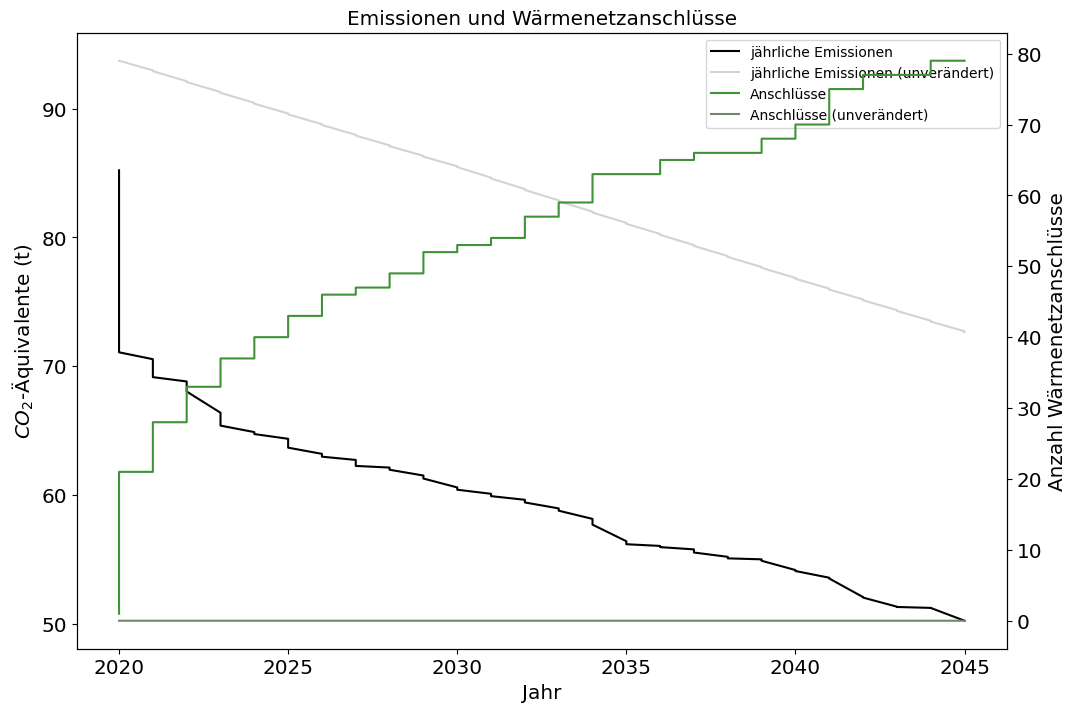

In [48]:

# plot:
fig = plt.figure(figsize=(12,8))
ax0 = plt.axes()  # all graphs shall be in the same figures
plt.title("Emissionen und Wärmenetzanschlüsse", fontsize='x-large')

##################### left y-axis: ####################
df_emissions.plot(
    kind='line',
    x='current_date',
    y=['emissions_neighborhood_total'],
    ax=ax0,
    label=["jährliche Emissionen"],
    color='black'
)

df_emissions_compare.plot(
    kind='line',
    x='current_date',
    y=['emissions_neighborhood_total'],
    ax=ax0,
    color='lightgray',
    label=["jährliche Emissionen (unverändert)"]
)
plt.gca().set_ylabel("$CO_{2}$-Äquivalente (t)", fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')
ax0.legend(fontsize='x-large')

#################### right y-axis: ####################
df_connections.plot(
    kind='line',
    x='current_date',
    y=['value'],
    secondary_y=True,
    mark_right=False,
    ax=ax0,
    label=['Anschlüsse'],
    color='#3f9236'
)
plt.gca().set_ylabel('Anzahl Wärmenetzanschlüsse', fontsize='x-large')
plt.gca().set_yticks(range(0, len(session.buildings.df), 10),fontsize='x-large')
plt.xticks(fontsize='x-large')

df_connections_compare.plot(
    kind='line',
    x='current_date',
    y=['value'],
    secondary_y=True,
    mark_right=False,
    ax=ax0,
    color='#73876d',
    label=['Anschlüsse (unverändert)'],
)

plt.yticks(fontsize='x-large')
ax0.set_xlabel('Jahr', fontsize='x-large')
ax0.set_xticks(range(2020,2050,5), fontsize='x-large')
# ax0.legend(fontsize='x-large')


## sharing the legend properly:
by using ax.plot instead of df.plot, the labels can be combined (with adjusted fontsize) into one legend

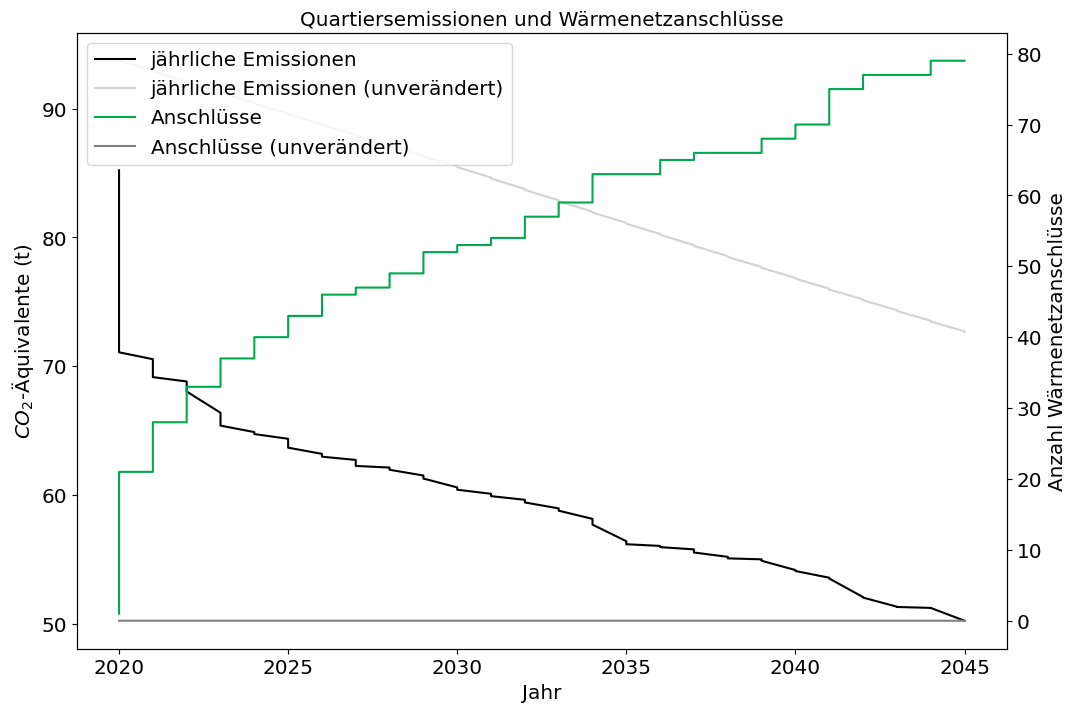

In [49]:
# plot:
fig = plt.figure(figsize=(12,8))
ax0 = plt.axes()  # all graphs shall be in the same figures
plt.title("Quartiersemissionen und Wärmenetzanschlüsse", fontsize='x-large')

##################### left y-axis: ####################
line1, = ax0.plot(
    df_emissions['current_date'],
    df_emissions['emissions_neighborhood_total'],
    color='black'
)

line2, = ax0.plot(
    df_emissions_compare['current_date'],
    df_emissions_compare['emissions_neighborhood_total'],
    color='lightgray'
)
plt.gca().set_ylabel("$CO_{2}$-Äquivalente (t)", fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')

#################### right y-axis: ####################
ax1 = ax0.twinx()
line3, = ax1.plot(
    df_connections['current_date'],
    df_connections['value'],
    color='#00a84e'
)
plt.gca().set_ylabel('Anzahl Wärmenetzanschlüsse', fontsize='x-large')
plt.gca().set_yticks(range(0, len(session.buildings.df), 10),fontsize='x-large')
plt.xticks(fontsize='x-large')

line4, = ax1.plot(
    df_connections_compare['current_date'],
    df_connections_compare['value'],
    color='gray'
)

plt.yticks(fontsize='x-large')
ax0.set_xlabel('Jahr', fontsize='x-large')
ax0.set_xticks(range(2020,2050,5), fontsize='x-large')
plt.legend([line1, line2, line3, line4], ["jährliche Emissionen", "jährliche Emissionen (unverändert)",'Anschlüsse','Anschlüsse (unverändert)'], loc='upper left', fontsize='x-large')


## bar plots:

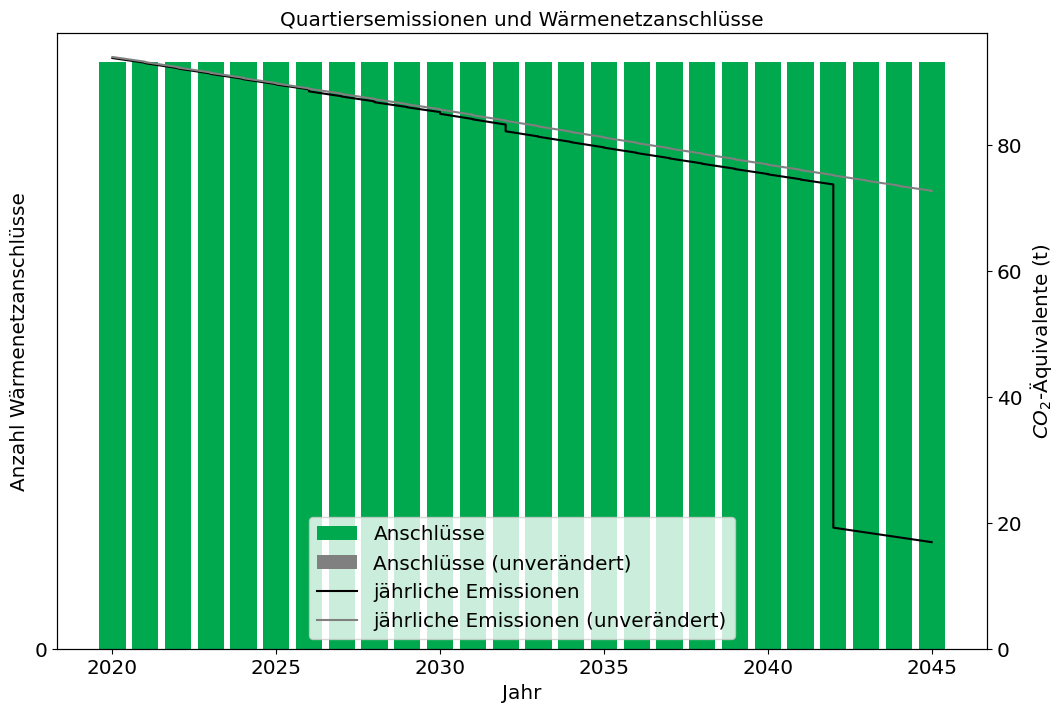

In [4]:
# plot:
fig = plt.figure(figsize=(12,8))
ax0 = plt.axes()  # all graphs shall be in the same figures
plt.title("Quartiersemissionen und Wärmenetzanschlüsse", fontsize='x-large')

##################### left y-axis: ####################

plot1 = ax0.bar(
    df_connections.iloc[::365, :]['current_date'],
    df_connections.iloc[::365, :]['value'],
    color='#00a84e'
)
plt.gca().set_ylabel('Anzahl Wärmenetzanschlüsse', fontsize='x-large')
plt.gca().set_yticks(range(0, len(session.buildings.df), 10),fontsize='x-large')

plot2 = ax0.bar(
    df_connections_compare['current_date'],
    df_connections_compare['value'],
    color='gray'
)
ax0.set_xlabel('Jahr', fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')


#################### right y-axis: ####################
ax1 = ax0.twinx()
plot3, = ax1.plot(
    df_emissions['current_date'],
    df_emissions['emissions_neighborhood_total'],
    color='black'
)

plot4, = ax1.plot(
    df_emissions_compare['current_date'],
    df_emissions_compare['emissions_neighborhood_total'],
    color='gray'
)
plt.gca().set_ylabel("$CO_{2}$-Äquivalente (t)", fontsize='x-large')
ax1.set_ylim(bottom=0)

plt.yticks(fontsize='x-large')
plt.legend([plot1, plot2, plot3, plot4], ['Anschlüsse','Anschlüsse (unverändert)', "jährliche Emissionen", "jährliche Emissionen (unverändert)"], loc='lower center', fontsize='x-large')
